In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import math
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_23456\828550362.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
stock=yf.download("TCS.BO",period="3y",actions=True)
stock

c:\Program Files\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-02-23,2971.600098,3027.899902,2970.000000,2980.000000,2877.312012,140264,0.0,0.0
2021-02-24,2980.199951,3002.250000,2701.000000,2951.399902,2849.697510,720041,0.0,0.0
2021-02-25,2980.000000,3029.449951,2969.100098,2992.899902,2889.767578,497914,0.0,0.0
2021-02-26,2968.500000,2971.899902,2881.350098,2896.050049,2796.254883,202274,0.0,0.0
2021-03-01,2930.000000,2964.949951,2900.000000,2926.199951,2825.365967,210795,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-02-19,4119.149902,4121.649902,4055.100098,4101.600098,4101.600098,56840,0.0,0.0
2024-02-20,4089.899902,4098.850098,4011.100098,4029.949951,4029.949951,30284,0.0,0.0
2024-02-21,4018.850098,4063.000000,3980.000000,3989.300049,3989.300049,24380,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

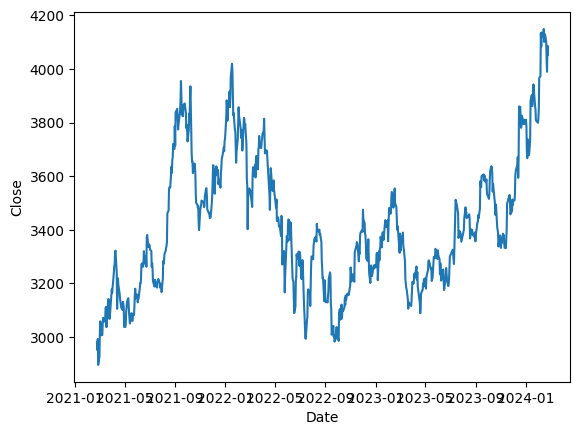

In [3]:
sns.lineplot(data=stock,x="Date",y="Close")

In [4]:
data=stock.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

544

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.06699382],
       [0.04417035],
       [0.07728822],
       [0.        ],
       [0.02406026],
       [0.0913734 ],
       [0.1297581 ],
       [0.12101981],
       [0.08854039],
       [0.08869996],
       [0.12281535],
       [0.14037182],
       [0.12836156],
       [0.13590302],
       [0.16969909],
       [0.17289117],
       [0.11232146],
       [0.13342907],
       [0.18637784],
       [0.19631317],
       [0.17947485],
       [0.13725961],
       [0.1373393 ],
       [0.21059766],
       [0.22468285],
       [0.21534585],
       [0.27392071],
       [0.29351216],
       [0.29901843],
       [0.33552789],
       [0.34007657],
       [0.27563638],
       [0.16674645],
       [0.2576809 ],
       [0.23721174],
       [0.21311155],
       [0.19794915],
       [0.17799862],
       [0.17057699],
       [0.16363425],
       [0.18797389],
       [0.18174928],
       [0.17329018],
       [0.11359817],
       [0.11248102],
       [0.12201733],
       [0.15984365],
       [0.171

In [6]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    

In [7]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(484, 60, 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [10]:
model.fit(x_train,y_train,epochs=20,batch_size=1)

Epoch 1/20
484/484 [==============================] - 11s 15ms/step - loss: 0.0092
Epoch 2/20
484/484 [==============================] - 7s 15ms/step - loss: 0.0040
Epoch 3/20
484/484 [==============================] - 7s 15ms/step - loss: 0.0034
Epoch 4/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0026
Epoch 5/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0024
Epoch 6/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0019
Epoch 7/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0020
Epoch 8/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0023
Epoch 9/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0020
Epoch 10/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0018
Epoch 11/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0019
Epoch 12/20
484/484 [==============================] - 7s 14ms/step - loss: 0.0017
Epoch 13/20


In [11]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [12]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [13]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


6/6 [==============================] - 1s 9ms/step


In [14]:
rmse= np.sqrt(((predictions - y_test) ** 2).mean())
rmse

50.43595160047256

In [15]:
closes=[]
closes.extend(data['Close'])
average_close = sum(closes) / len(closes)
#print(average_close)
average_deviation=rmse/average_close*100
average_deviation


1.4752283289818087

In [16]:
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions



C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_23456\1670264632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


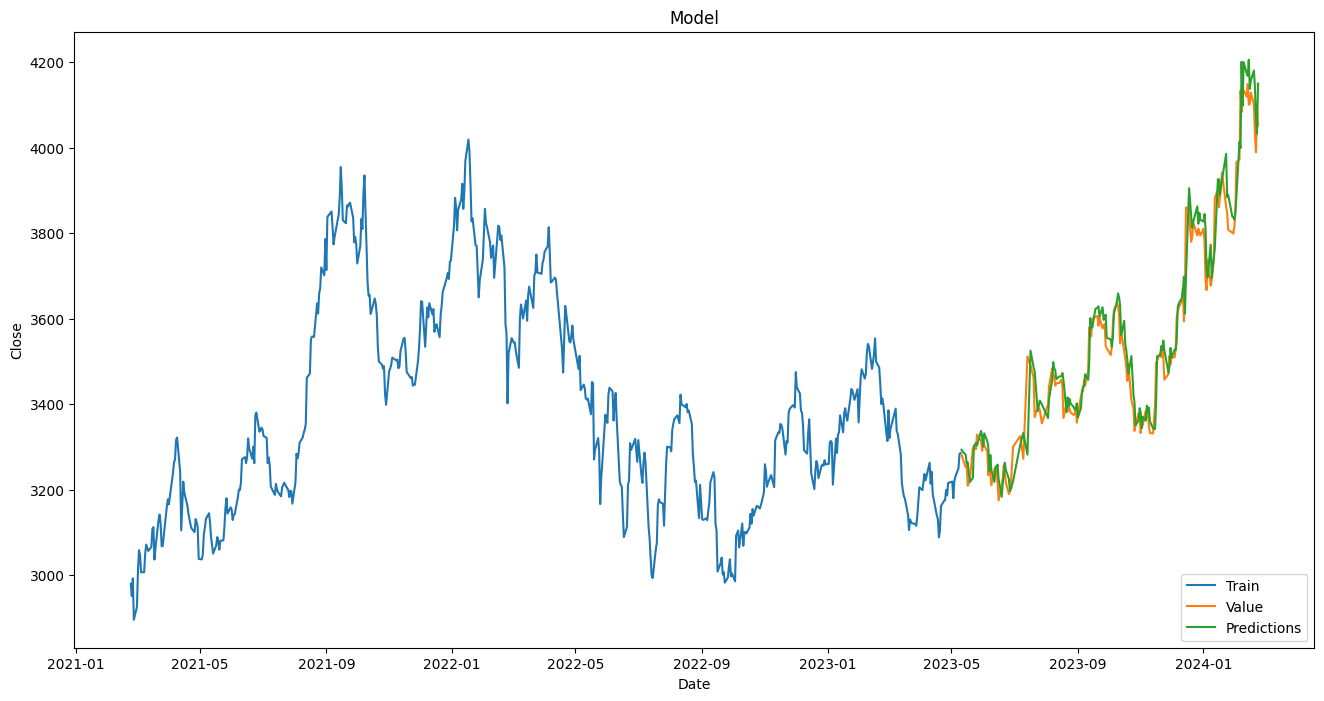

In [17]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [18]:
trace_train = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace_valid = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Value')
trace_predictions = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Define layout
layout = go.Layout(title='Model', xaxis=dict(title='Date'), yaxis=dict(title='Close'), legend=dict(x=0, y=1))

# Create figure
fig = go.Figure(data=[trace_train, trace_valid, trace_predictions], layout=layout)
pio.show(fig)

In [19]:
valid

,Close,Predictions
Date,,
2023-05-11,3281.500000,3293.517822
2023-05-12,3273.750000,3289.571777
2023-05-15,3253.149902,3281.921631
2023-05-16,3257.000000,3261.513428
2023-05-17,3209.100098,3264.376709
...,...,...
2024-02-19,4101.600098,4180.599121
2024-02-20,4029.949951,4140.369141
2024-02-21,3989.300049,4066.019287


quote=yf.download("TCS.BO",period=)
new_df=quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test.shape[0],(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)